In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# DATA CLEANING (TRAIN DATA)

In [6]:
df_train['Survived'] = df_train['Survived'].astype('O')
df_train['Pclass'] = df_train['Pclass'].astype('O')

In [7]:
df_cat = df_train.select_dtypes('O')
df_cat.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [8]:
df_cat.isnull().sum()/len(df_train)*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Ticket       0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [9]:
#Since cabin has more than 75% missing values, we shall drop this column

df_cat.drop('Cabin',axis = 1, inplace = True)


In [10]:
df_cat['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
#Replacing missing values in Embarked with most frequest values

df_cat['Embarked'] = df_cat['Embarked'].replace(np.nan,'S')

df_cat.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

In [12]:
df_num = df_train.select_dtypes(np.number)
df_num.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
df_num.isnull().sum()

PassengerId      0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [14]:
df_num['Age'] = df_num['Age'].replace(np.nan,df_num['Age'].median())

In [15]:
df_num.isnull().sum()


PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [16]:
df_train = pd.concat([df_cat,df_num],axis = 1)
df_train.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Ticket         0
Embarked       0
PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# DATA CLEANING (TEST DATA)

In [17]:

df_test['Pclass'] = df_test['Pclass'].astype('O')

In [18]:
df_test_cat = df_test.select_dtypes('O')
df_test_cat.columns

Index(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [19]:
df_test_cat.isnull().sum()/len(df_test)*100

Pclass       0.000000
Name         0.000000
Sex          0.000000
Ticket       0.000000
Cabin       78.229665
Embarked     0.000000
dtype: float64

In [20]:
#Since cabin has more than 75% missing values, we shall drop this column

df_test_cat.drop('Cabin',axis = 1, inplace = True)

In [21]:
df_test_cat['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [22]:
#Replacing missing values in Embarked with most frequest values

df_test_cat['Embarked'] = df_test_cat['Embarked'].replace(np.nan,'S')

df_test_cat.isnull().sum()

Pclass      0
Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

In [23]:
df_test_num = df_test.select_dtypes(np.number)
df_test_num.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [24]:
df_test_num.isnull().sum()

PassengerId     0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

In [25]:
df_test_num['Age'] = df_test_num['Age'].replace(np.nan,df_test_num['Age'].median())

In [26]:
df_test_num['Fare'] = df_test_num['Fare'].replace(np.nan,df_test_num['Fare'].median())

In [27]:
df_test_num.isnull().sum()


PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [28]:
df_test = pd.concat([df_test_cat,df_test_num],axis = 1)
df_test.isnull().sum()

Pclass         0
Name           0
Sex            0
Ticket         0
Embarked       0
PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# EDA

In [29]:
df_train.head(3)

,Survived,Pclass,Name,Sex,Ticket,Embarked,PassengerId,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,1,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,2,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,3,26.0,0,0,7.9250


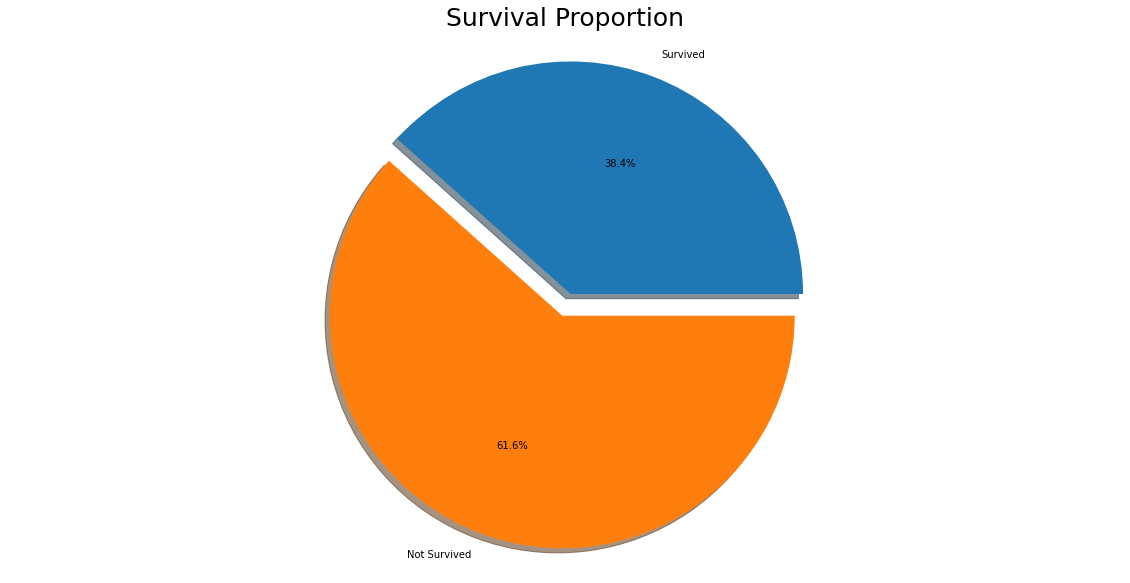

In [30]:
fig, axs = plt.subplots(figsize=(20, 10))
sizes = [df_train['Survived'][df_train['Survived']==1].count(), df_train['Survived'][df_train['Survived']==0].count()]
axs.pie(sizes, explode=(0, 0.1), labels=['Survived', 'Not Survived'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Survival Proportion", size = 25)
plt.show()

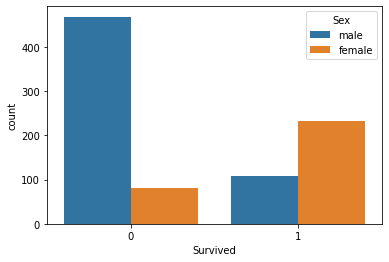

In [31]:
sns.countplot(data = df_train,x = 'Survived',hue ='Sex')
plt.show()

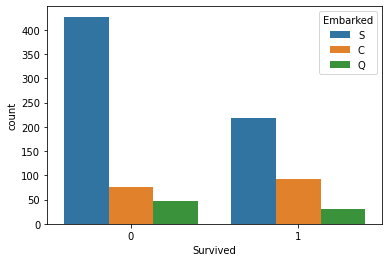

In [32]:
sns.countplot(data = df_train,x = 'Survived',hue ='Embarked')
plt.show()

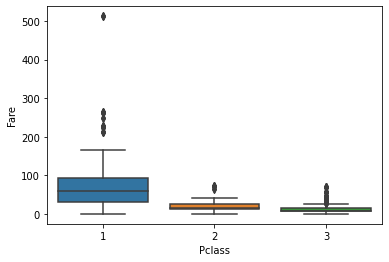

In [33]:
sns.boxplot(data = df_train, x='Pclass',y = 'Fare')
plt.show()

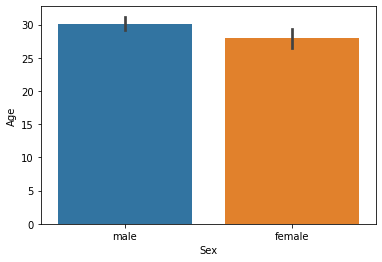

In [34]:


sns.barplot(df_train['Sex'],df_train['Age'])

plt.show()

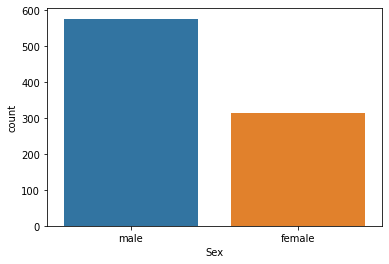

In [35]:
sns.countplot(df_train['Sex'])

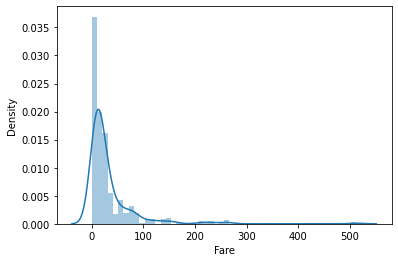

In [36]:
sns.distplot(df_train['Fare'])

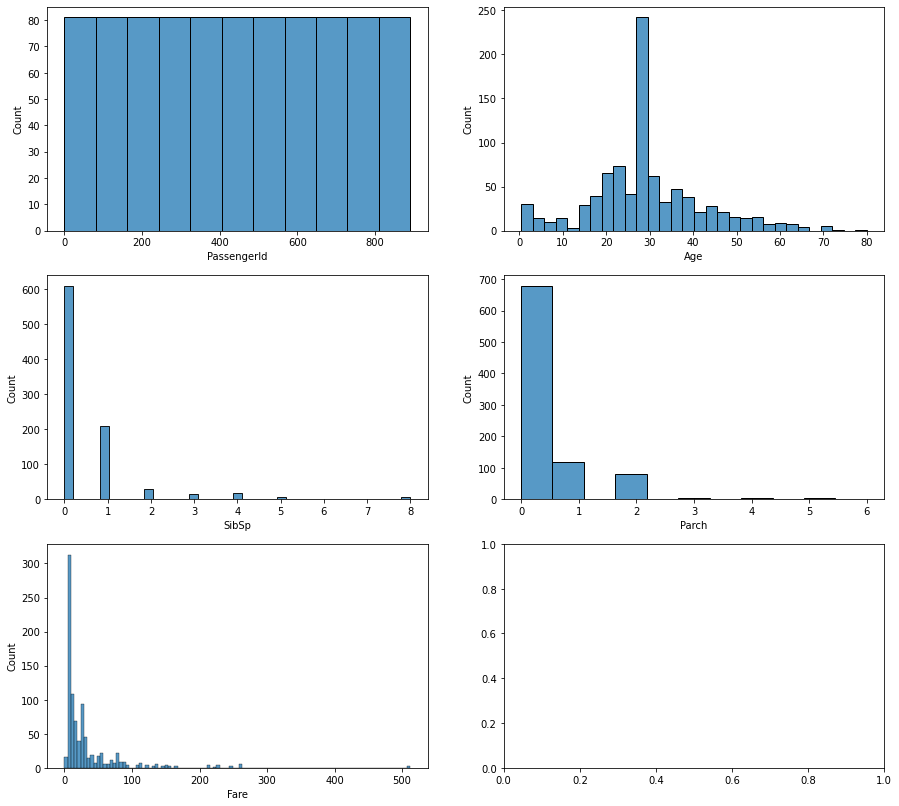

In [37]:
fig,ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,14))
df_num = df_train.select_dtypes(np.number)
for i,j in zip(df_num.columns,ax.flatten()):
    sns.histplot(df_num[i],ax = j)
    
    
plt.show()

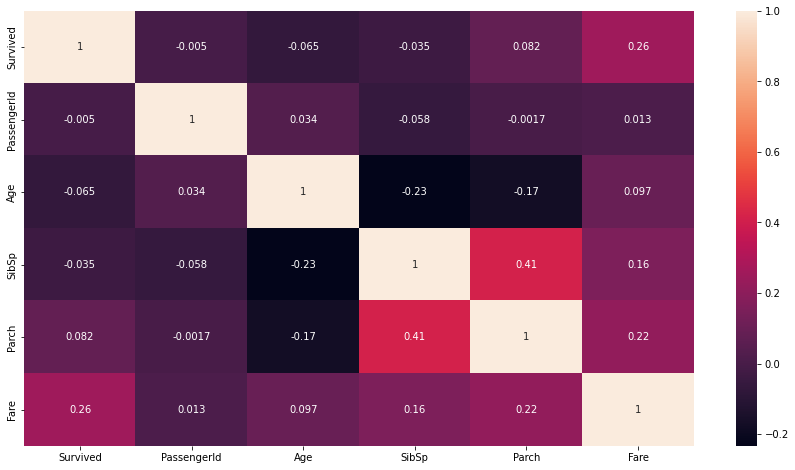

In [38]:
df_train['Survived'] = df_train['Survived'].astype('int')

plt.figure(figsize = (15,8))

sns.heatmap(df_train.corr(),annot = True)

plt.show()

In [39]:
df_train.shape

(891, 11)

In [40]:
df_test.shape

(418, 10)

# Model Building

In [41]:
from sklearn.ensemble import RandomForestClassifier
y = df_train['Survived']
X = df_train[['Pclass','SibSp','Parch','Age']]
X = pd.get_dummies(X,drop_first = True)


In [42]:
X.shape

(891, 5)

In [43]:
X_test = df_test[['Pclass','SibSp','Parch','Age']]


In [44]:
x_test = pd.get_dummies(X_test,drop_first = True)


In [45]:
x_test.shape

(418, 5)

In [46]:
X.columns 

Index(['SibSp', 'Parch', 'Age', 'Pclass_2', 'Pclass_3'], dtype='object')

In [47]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state = 1)
model.fit(X,y)
y_pred=model.predict(x_test)
score=model.score(X,y)
print(score)

0.8473625140291807


In [48]:
from sklearn.model_selection import GridSearchCV

tuned_params = [{'criterion':['gini','entropy'],'max_depth': range(2,10),'min_samples_split' : range(2,10)}]

grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 1),param_grid = tuned_params,cv = 5)

grid.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10),
                          'min_samples_split': range(2, 10)}])

In [49]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [50]:
model_tuned =DecisionTreeClassifier(criterion = 'gini',max_depth = 4, min_samples_split = 2, random_state = 1)
model_tuned.fit(X,y)
y_pred_final = model_tuned.predict(x_test)
score_final = model_tuned.score(X,y)
print(score_final)

0.7373737373737373


In [51]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
output.to_csv('submission_1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [52]:
from sklearn.ensemble import RandomForestClassifier
model_rf =RandomForestClassifier(random_state = 1)
model_rf.fit(X,y)
y_pred_rf=model_rf.predict(x_test)
score_rf = model_rf.score(X,y)
print(score_rf)

0.8473625140291807


In [53]:
from sklearn.model_selection import GridSearchCV

tuned_params = [{'criterion':['gini','entropy'],'max_depth': range(2,10),'min_samples_split' : range(2,10)}]

grid_rf = GridSearchCV(estimator = RandomForestClassifier(random_state = 1),param_grid = tuned_params,cv = 5)

grid_rf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10),
                          'min_samples_split': range(2, 10)}])

In [54]:
grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}

In [56]:

model_rf_tuned = RandomForestClassifier(criterion = 'gini', max_depth = 5 ,min_samples_split = 3,random_state = 1)
model_rf_tuned.fit(X,y)
y_pred_rf_tuned =model_rf_tuned.predict(x_test)
score_rf_tuned = model_rf_tuned.score(X,y)
print(score_rf_tuned)

0.7519640852974186


In [58]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred_rf_tuned})
output.to_csv('submission_3.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
